In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

### Задание 1
Реализовать вейвлет Морле во временном пространстве ψ(t) и в частотном пространстве ψ(ω).

Используя формулу вейвлета Морле, выясните, как сместить основную частоту фильтрации. 

Объясните, как выбор основной частоты влияет на фильтрацию сигнала и на поведение вейвлета.

Постройте графики временной и частотной формы вейвлета Морле при разных значениях основной частоты фильтрации.

![Формулы вейвлетов Морле:](pics/morlet.png)

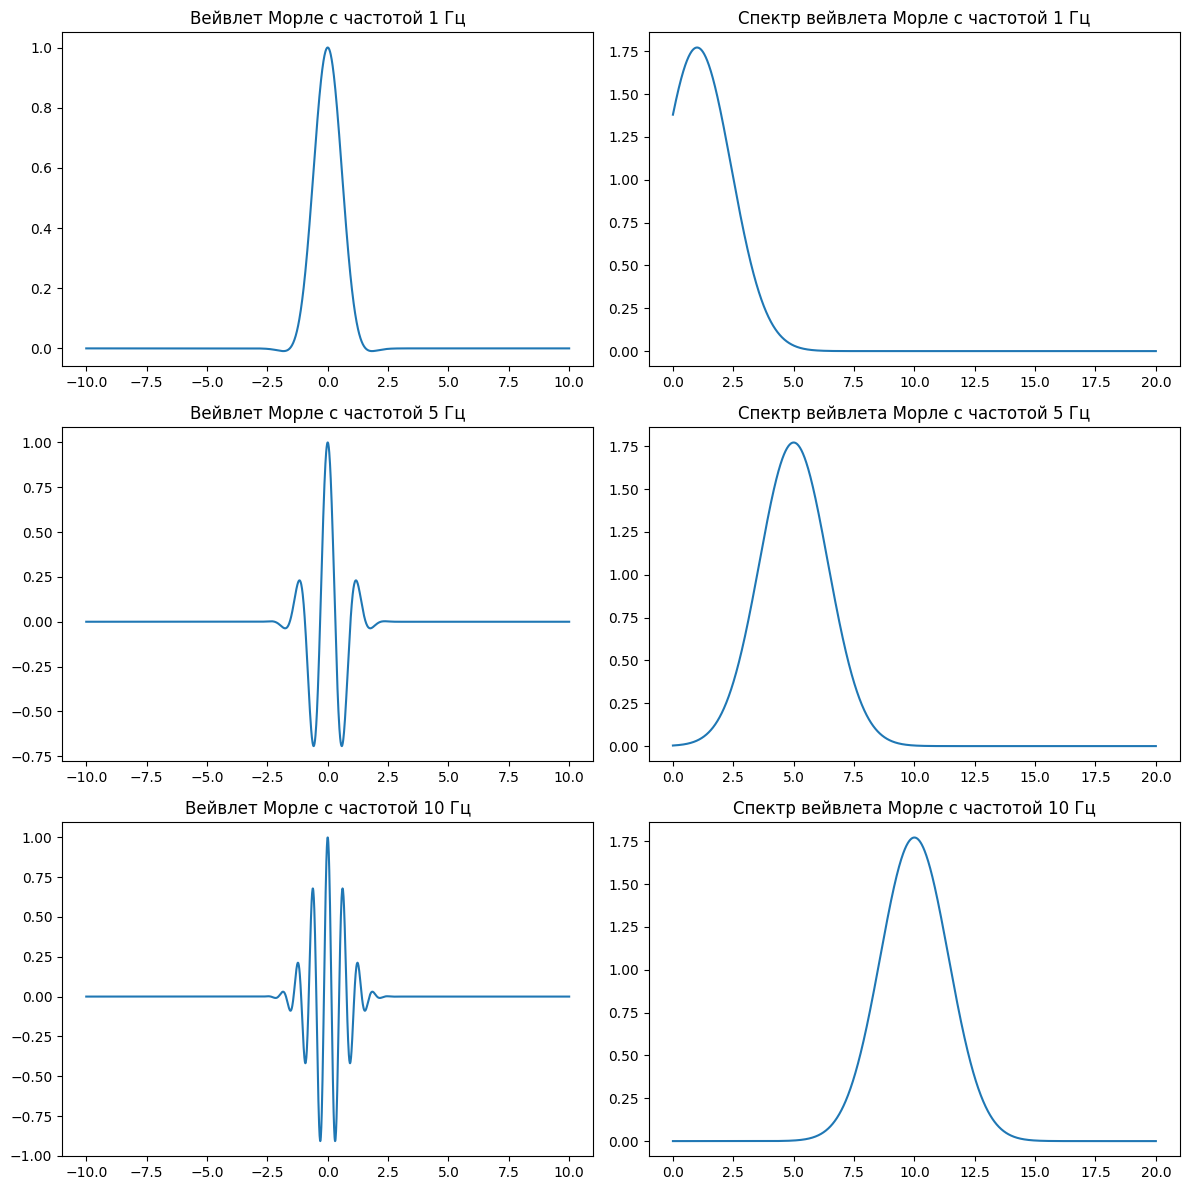

In [2]:
morlet_wavelet_time = lambda alpha, freq_0: lambda t: np.exp(-(t**2 / alpha**2)) * np.exp(1j * freq_0 * t)
morlet_wavelet_frequency = lambda alpha, freq_0: lambda t: alpha * np.sqrt(np.pi) * np.exp(-1/4 * (alpha**2) * (t - freq_0)**2)


x = np.linspace(-10, 10, 2000)
freq = np.linspace(0, 20, 2000)
a = 1

plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.title("Вейвлет Морле с частотой 1 Гц")
plt.plot(x, np.real(morlet_wavelet_time(alpha=a, freq_0=1)(x)))

plt.subplot(3, 2, 2)
plt.title("Спектр вейвлета Морле с частотой 1 Гц")
plt.plot(freq, np.abs(morlet_wavelet_frequency(alpha=a, freq_0=1)(freq)))

plt.subplot(3, 2, 3)
plt.title("Вейвлет Морле с частотой 5 Гц")
plt.plot(x, np.real(morlet_wavelet_time(alpha=a, freq_0=5)(x)))

plt.subplot(3, 2, 4)
plt.title("Спектр вейвлета Морле с частотой 5 Гц")
plt.plot(freq, np.abs(morlet_wavelet_frequency(alpha=a, freq_0=5)(freq)))

plt.subplot(3, 2, 5)
plt.title("Вейвлет Морле с частотой 10 Гц")
plt.plot(x, np.real(morlet_wavelet_time(alpha=a, freq_0=10)(x)))

plt.subplot(3, 2, 6)
plt.title("Спектр вейвлета Морле с частотой 10 Гц")
plt.plot(freq, np.abs(morlet_wavelet_frequency(alpha=a, freq_0=10)(freq)))

plt.tight_layout()
plt.show()

### Задание 2
Реализовать вейвлет “Мексиканская шляпа” во временном пространстве ψ(t) и в частотном пространстве ψ(ω).

Используя формулу “Мексиканская шляпа”, выясните, как сместить основную частоту фильтрации. 

Объясните, как выбор основной частоты влияет на фильтрацию сигнала и на поведение вейвлета. Ж
Постройте графики временной и частотной формы вейвлета "Мексиканская шляпа" при разных значениях основной частоты фильтрации.

![Формулы вейвлета "Мексиканская шляпа":](pics/mexican_hat.png)

Где:

![Пояснения к формулам:](pics/mexican_hat_2.png)

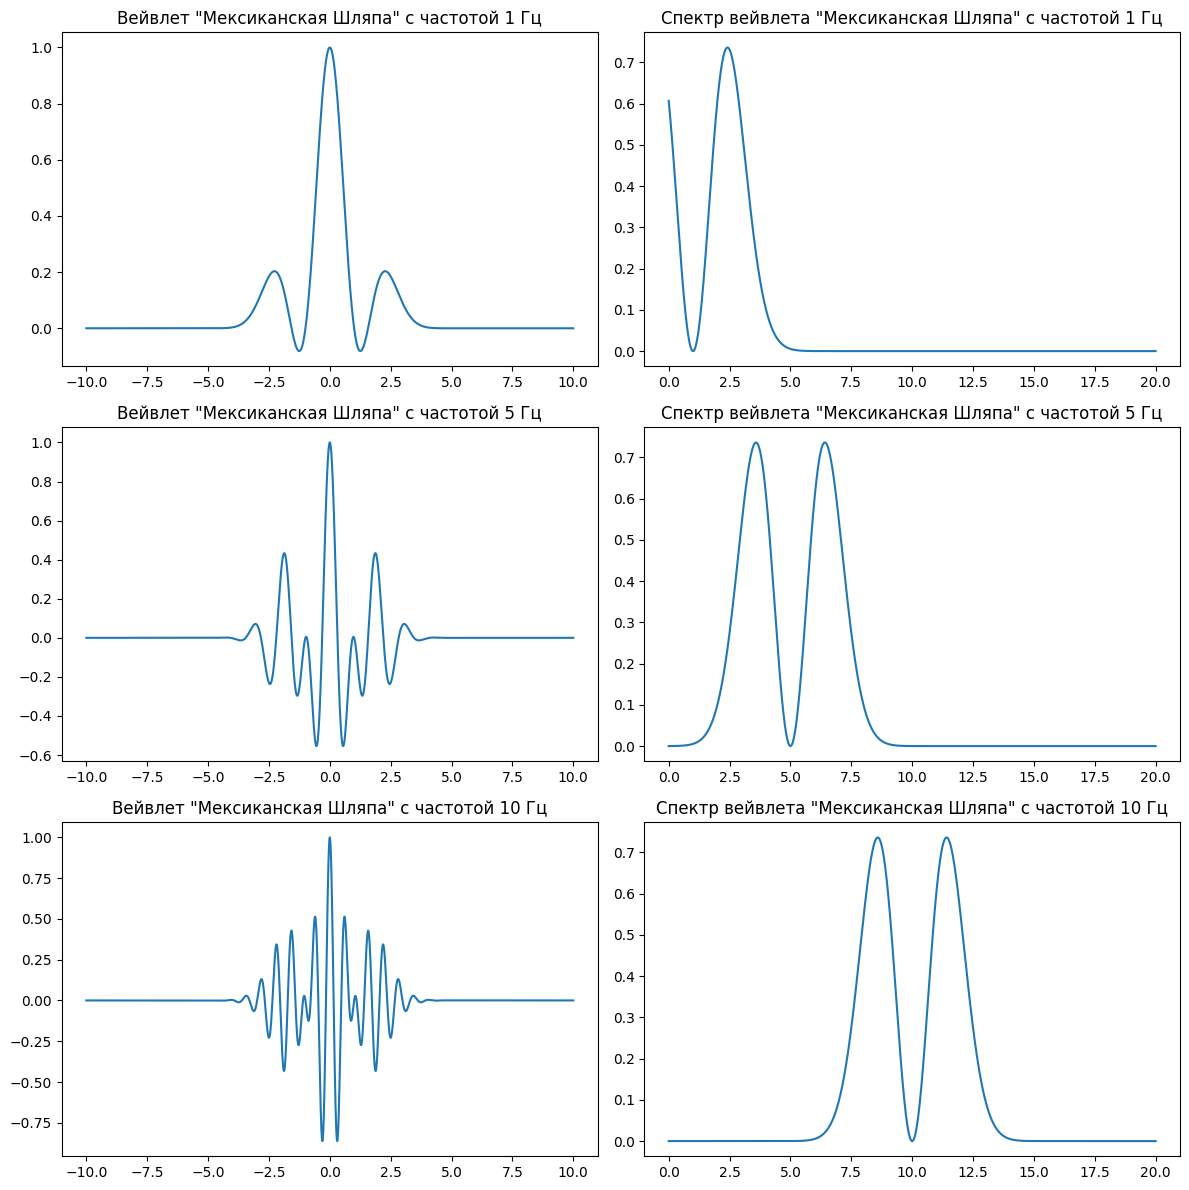

In [3]:
mexican_hat_time = lambda std, t_0, freq_0: lambda t: (1 - (t - t_0)**2 / std**2) * np.exp(-(t - t_0)**2 / (2 * std**2)) * np.exp(1j * freq_0 * t)
mexican_hat_frequency = lambda std, freq_0: lambda freq: (freq - freq_0)**2 * np.exp(-1/2 * (freq - freq_0)**2 * std**2)


plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.title("Вейвлет \"Мексиканская Шляпа\" с частотой 1 Гц")
plt.plot(x, np.real(mexican_hat_time(std=1, t_0=0, freq_0=1)(x)))

plt.subplot(3, 2, 2)
plt.title("Спектр вейвлета \"Мексиканская Шляпа\" с частотой 1 Гц")
plt.plot(freq, np.abs(mexican_hat_frequency(std=1, freq_0=1)(freq)))

plt.subplot(3, 2, 3)
plt.title("Вейвлет \"Мексиканская Шляпа\" с частотой 5 Гц")
plt.plot(x, np.real(mexican_hat_time(std=1, t_0=0, freq_0=5)(x)))

plt.subplot(3, 2, 4)
plt.title("Спектр вейвлета \"Мексиканская Шляпа\" с частотой 5 Гц")
plt.plot(freq, np.abs(mexican_hat_frequency(std=1, freq_0=5)(freq)))

plt.subplot(3, 2, 5)
plt.title("Вейвлет \"Мексиканская Шляпа\" с частотой 10 Гц")
plt.plot(x, np.real(mexican_hat_time(std=1, t_0=0, freq_0=10)(x)))

plt.subplot(3, 2, 6)
plt.title("Спектр вейвлета \"Мексиканская Шляпа\" с частотой 10 Гц")
plt.plot(freq, np.abs(mexican_hat_frequency(std=1, freq_0=10)(freq)))

plt.tight_layout()
plt.show()

### Задание 3
Реализовать вейвлет Хаара во временном пространстве ψ(t). Вейвлет состоит из двух
прямоугольных импульсов положительного для интервала 0 ≤ t < 0.5 и отрицательного для
интервала 0.5 ≤ t < 1 и может быть представлен согласно формуле:

![Формула Хаара для временной области:](pics/haar_1.png)

В частотной области вейвлет Хаара ψ(ω) может быть получен с помощью преобразования
Фурье от формулы ψ(t) или используя формулу:

![Формула Хаара для частотной области:](pics/haar_2.png)

Чтобы изменить центральную частоту фильтрации, мы можем применить масштабирование
согласно формуле (7).
 
Если мы хотим увеличить центральную частоту, нужно уменьшить
временной масштаб и наоборот. 

Масштабирование во временной области приводит к
изменению частотных характеристик в частотной области согласно формуле (8).

![Формула Хаара для временной области:](pics/haar_3.png)

Постройте графики временной и частотной формы вейвлета Хаара при разных значениях
основной частоты фильтрации.

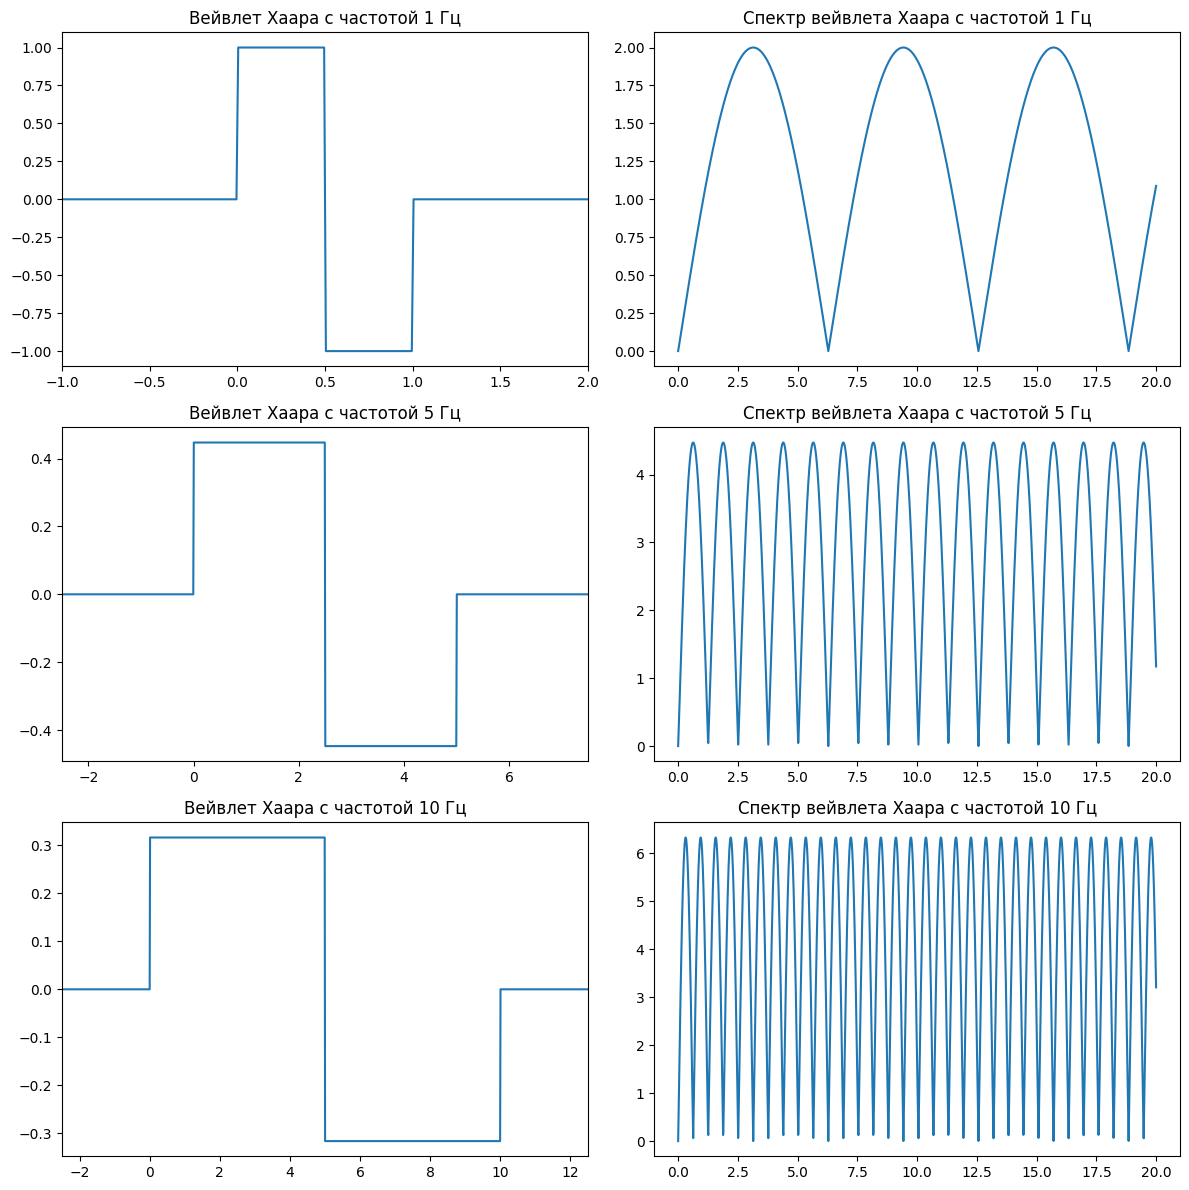

In [4]:
def haar_wavelet_func(t):
    out = np.empty_like(t)
    for i in range(len(t)):
        if 0 <= t[i] < 0.5:
            out[i] = 1
        elif 0.5 <= t[i] < 1:
            out[i] = -1
        else:
            out[i] = 0
    return out


haar_wavelet_time = lambda t: haar_wavelet_func(t)
haar_wavelet_time_scaled = lambda a, t: (1/np.sqrt(a)) * haar_wavelet_func(t/a)

haar_wavelet_frequency = lambda freq: 2j * np.sin(freq/2) * np.exp(-1j*freq/2)
haar_wavelet_frequency_scaled = lambda a, freq: np.sqrt(a) * haar_wavelet_frequency(a*freq)


plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.title("Вейвлет Хаара с частотой 1 Гц")
plt.plot(x, np.real(haar_wavelet_time(x)))
plt.xlim(-1, 2)

plt.subplot(3, 2, 2)
plt.title("Спектр вейвлета Хаара с частотой 1 Гц")
plt.plot(freq, np.abs(haar_wavelet_frequency(freq)))

plt.subplot(3, 2, 3)
plt.title("Вейвлет Хаара с частотой 5 Гц")
plt.plot(x, np.real(haar_wavelet_time_scaled(5, x)))
plt.xlim(-2.5, 7.5)

plt.subplot(3, 2, 4)
plt.title("Спектр вейвлета Хаара с частотой 5 Гц")
plt.plot(freq, np.abs(haar_wavelet_frequency_scaled(5, freq)))

plt.subplot(3, 2, 5)
plt.title("Вейвлет Хаара с частотой 10 Гц")
plt.plot(np.linspace(-10, 13, 2000), np.real(haar_wavelet_time_scaled(10, np.linspace(-10, 13, 2000))))
plt.xlim(-2.5, 12.5)

plt.subplot(3, 2, 6)
plt.title("Спектр вейвлета Хаара с частотой 10 Гц")
plt.plot(freq, np.abs(haar_wavelet_frequency_scaled(10, freq)))

plt.tight_layout()
plt.show()

### Задание 4
Рассмотреть произвольный сигнал с шумом.

Реализовать свертку сигнала с вейвлетами Морле, “Мексиканская шляпа” и Хаара.

Осуществить фильтрацию сигналов с помощью этих 3-х вейвлетов.

Сравнить результаты.

Отметить сильные и слабые стороны каждого из вейвлетов.

/home/vadik/nsu/python/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/vadik/nsu/python/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


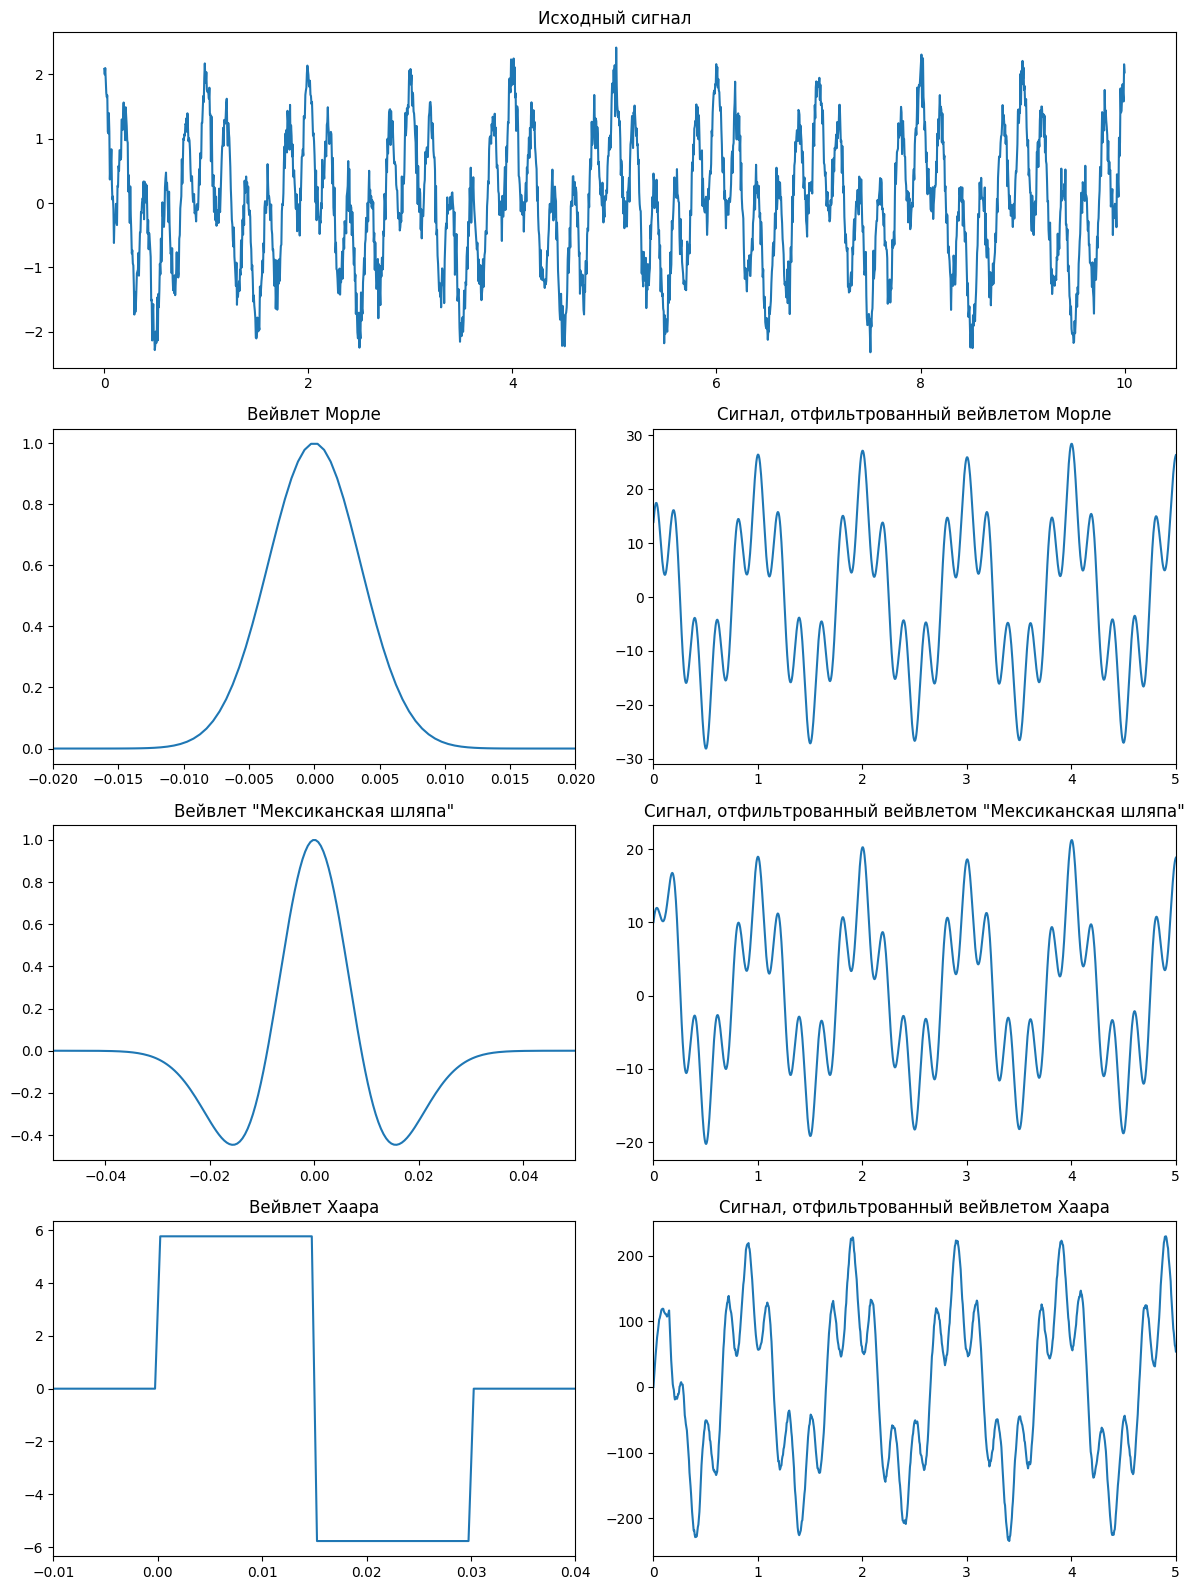

In [5]:
signal = lambda t: np.cos(t * 2 * np.pi) + np.cos(5 * t * 2 * np.pi)

signal_x = np.linspace(0, 10, 2000)
signal_y = signal(signal_x)
noised_y = signal_y + np.random.normal(0, 0.2, size=signal_y.shape)

kernel_x = np.linspace(-0.5, 0.5, 2000)
kernel_morlet = morlet_wavelet_time(alpha=0.005, freq_0=0)(kernel_x)
kernel_mexican = mexican_hat_time(std=0.009, t_0=0, freq_0=0)(kernel_x)
kernel_haar = haar_wavelet_time_scaled(a=0.03, t=kernel_x)

filtered_morlet = np.convolve(noised_y, np.real(kernel_morlet), 'same')
filtered_mexican = np.convolve(noised_y, kernel_mexican, 'same')
filtered_haar = np.convolve(noised_y, kernel_haar, 'same')

plt.figure(figsize=(12, 16))

plt.subplot(4, 1, 1)
plt.title("Исходный сигнал")
# plt.plot(signal_x, signal_y)
plt.plot(signal_x, noised_y)

plt.subplot(4, 2, 3)
plt.title("Вейвлет Морле")
plt.plot(kernel_x, kernel_morlet)
plt.xlim(-0.02, 0.02)

plt.subplot(4, 2, 4)
plt.title("Сигнал, отфильтрованный вейвлетом Морле")
plt.plot(signal_x, filtered_morlet)
plt.xlim(0, 5)

plt.subplot(4, 2, 5)
plt.title("Вейвлет \"Мексиканская шляпа\"")
plt.plot(kernel_x, kernel_mexican)
plt.xlim(-0.05, 0.05)

plt.subplot(4, 2, 6)
plt.title("Сигнал, отфильтрованный вейвлетом \"Мексиканская шляпа\"")
plt.plot(signal_x, filtered_mexican)
plt.xlim(0, 5)

plt.subplot(4, 2, 7)
plt.title("Вейвлет Хаара")
plt.plot(kernel_x, kernel_haar)
plt.xlim(-0.01, 0.04)

plt.subplot(4, 2, 8)
plt.title("Сигнал, отфильтрованный вейвлетом Хаара")
plt.plot(signal_x, filtered_haar)
plt.xlim(0, 5)

plt.tight_layout()
plt.show()

### Задание 5
На рис 5.(а) приведен сигнал, частота которого меняется со временем. 

На рис 5.(б) представлена спектрограмма данного сигнала, которая получена в результате сверки сигнала с вейвлетом Морле. 

Реализовать данный код на языке программирования Python. Разобраться в построении спектрограммы.

![Изоюражение для задания 5](pics/5.5-img.png)

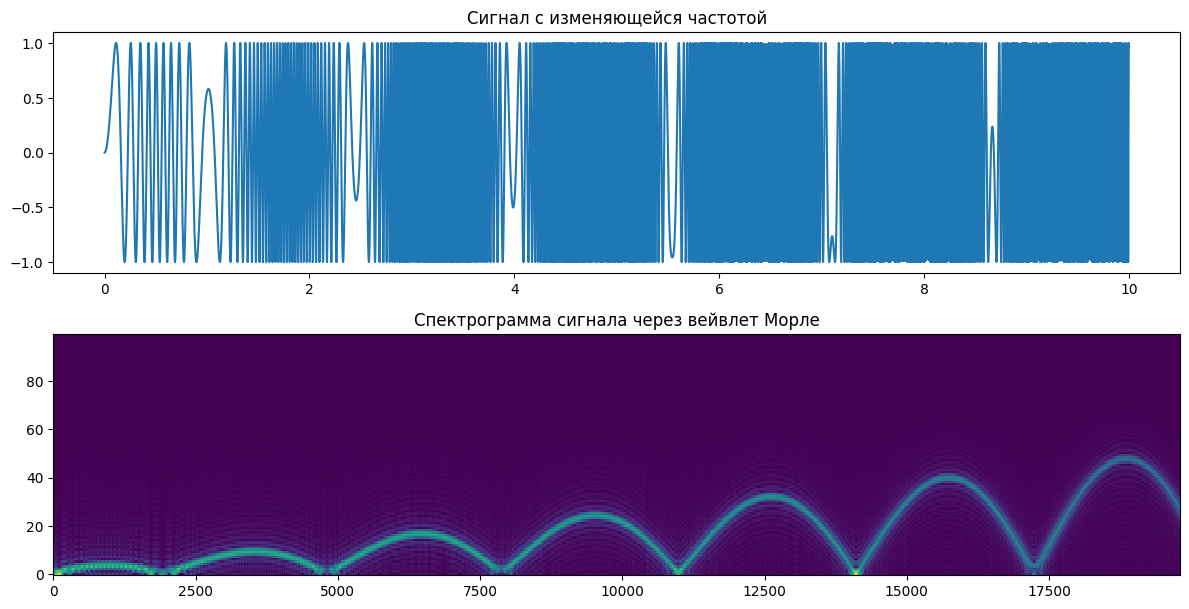

In [6]:
time_0 = 0
time_1 = 10
N = 20000
sample_length = 200
step = float(time_1 - time_0) / N

time_depend_signal = lambda t: np.sin(2 * np.pi * t * 10 * np.sin(t * 2))
y = np.linspace(time_0, time_1, N)

kernel_x = np.linspace(-0.05, 0.05, 500)
morlet_y = morlet_wavelet_time(alpha=0.0005, freq_0=40)(kernel_x)

spectrogram = np.zeros(shape=(N - sample_length + 1, sample_length//2))
for sample_start in range(N - sample_length + 1):
    t = np.linspace(time_0 + sample_start * step, time_0 + (sample_start + sample_length) * step, sample_length)
    spectrogram[sample_start] = np.abs(np.fft.fft(np.convolve(time_depend_signal(t), morlet_y, mode='same'))[0:sample_length // 2])

plt.figure(figsize=(12, 12))

plt.subplot(4, 1, 1)
plt.title("Сигнал с изменяющейся частотой")
plt.plot(y, time_depend_signal(y))

plt.subplot(4, 1, 2)
plt.title("Спектрограмма сигнала через вейвлет Морле")
plt.imshow(np.transpose(spectrogram), cmap='viridis', aspect='auto', origin='lower', interpolation='none')

plt.tight_layout()
plt.show()

### Задание 6
Скачайте с интернета любой аудио файл, постройте для него три спектрограммы
используя вейвлет Морле, вейвлет Хаара и вейвлет “Мексиканская шляпа. Объясните
результаты.

Убедитесь, что Ваш алгоритм работает правильно, для этого скачайте аудио звук
любой чистой ноты и постройте для него три спектрограммы используя вейвлет
Морле, вейвлет Хаара и вейвлет “Мексиканская шляпа. Например, для ноты “ля”
первой октавы основная гармоника должна соответствовать 440 Гц.

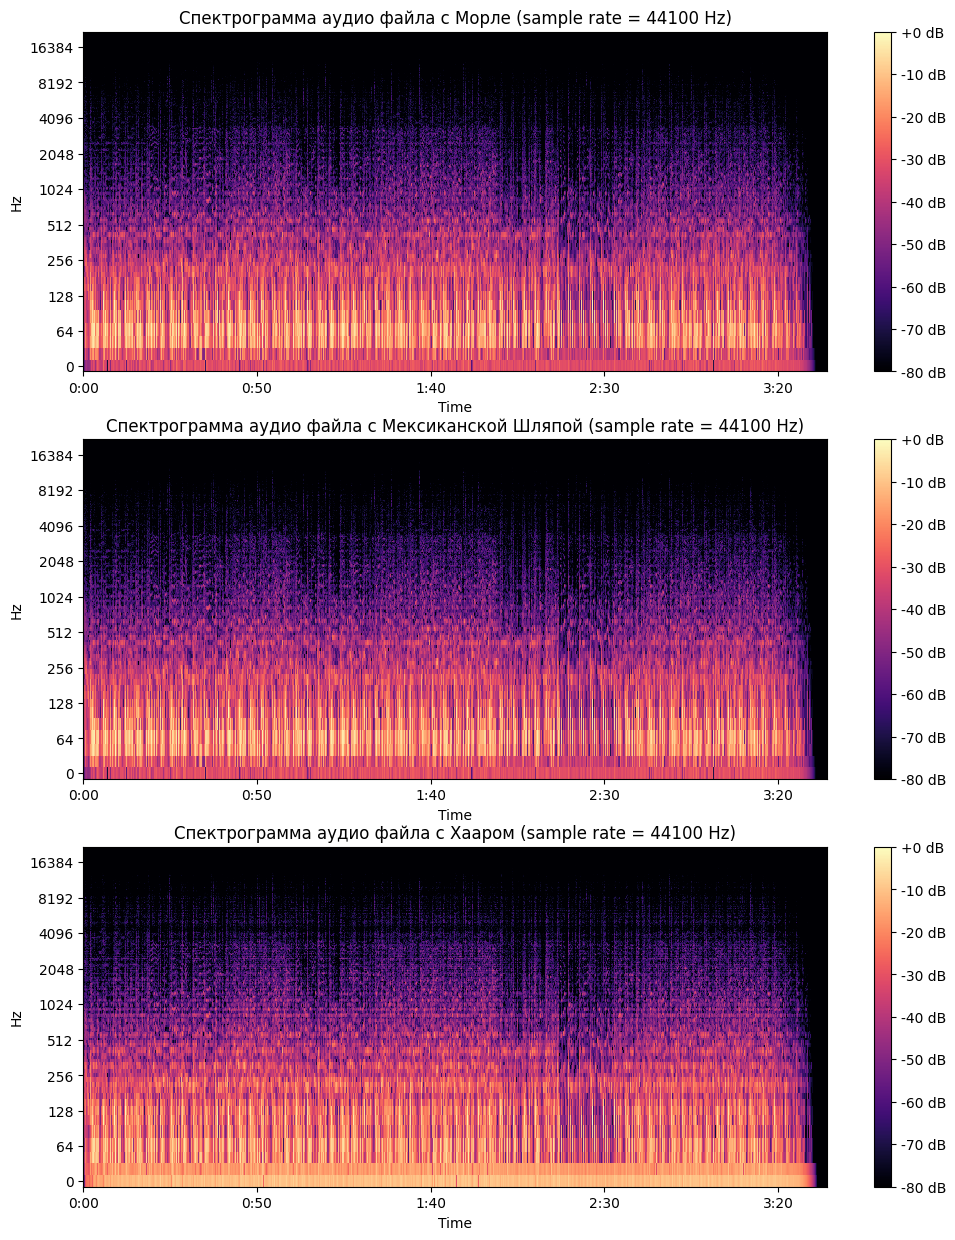

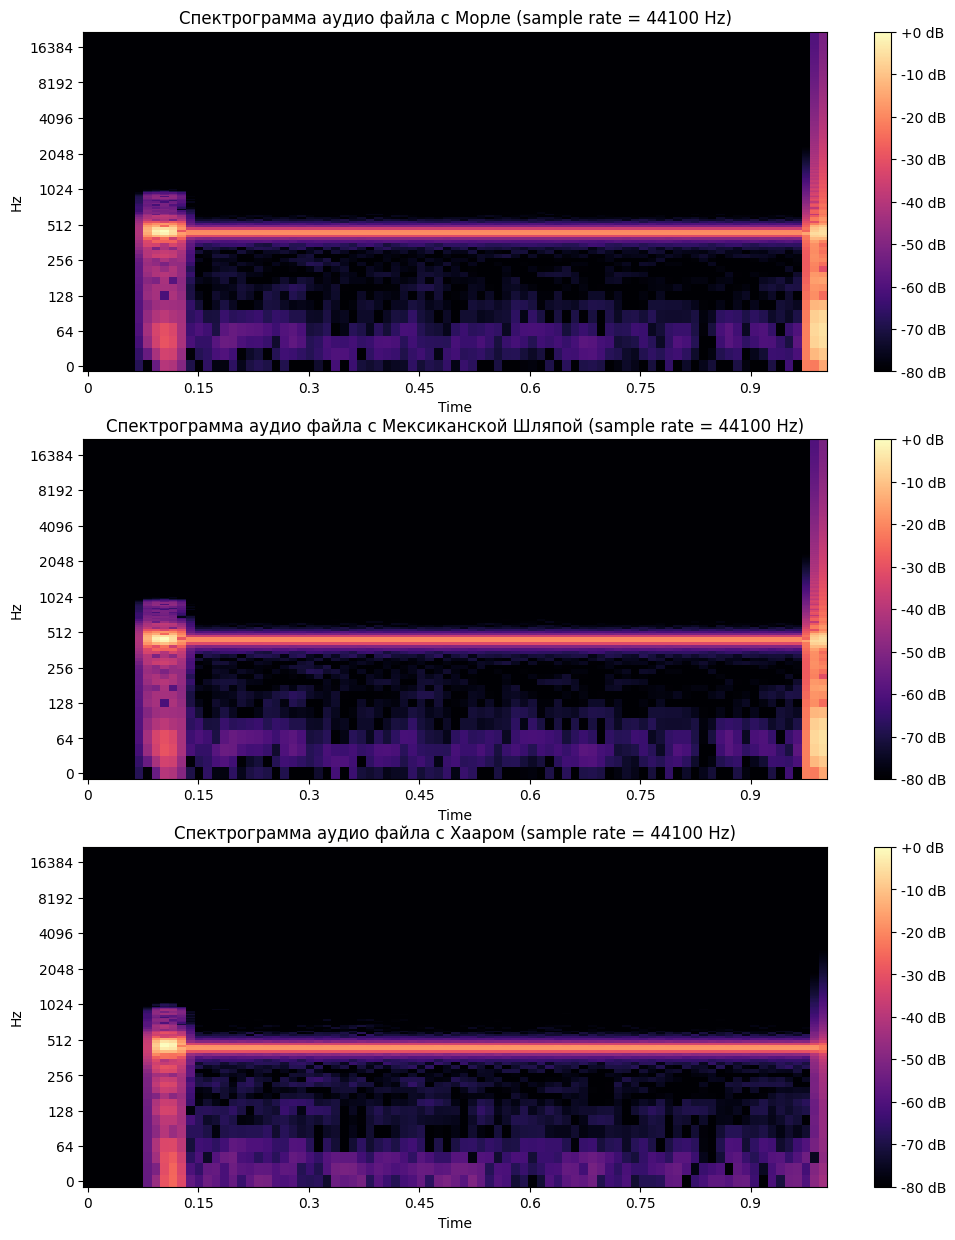

In [7]:
def visualise_spectrogram(title, data, sample_rate, k):
    plt.subplot(3, 1, k)
    librosa.display.specshow(data, x_axis='time', y_axis='log', sr=sample_rate)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title} (sample rate = {sample_rate} Hz)')


def make_spectrogram(file):
    data, sample_rate = librosa.load(file, sr=None)
    N = 1000
    
    kernel_t = np.linspace(-0.5 * N/sample_rate, 0.5 * N/sample_rate, N)
    data_morlet = np.real(np.convolve(data, morlet_wavelet_time(alpha=1, freq_0=256)(kernel_t), mode='same'))
    data_mexican_hat = np.real(np.convolve(data, mexican_hat_time(std=1, t_0=0, freq_0=256)(kernel_t), mode='same'))
    data_haar = np.real(np.convolve(data, haar_wavelet_time_scaled(a=256, t=kernel_t), mode='same'))
    
    plt.figure(figsize=(12, 15))
    
    # visualise_spectrogram("Спектрограмма без свёртки", librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sample_rate, 1)
    visualise_spectrogram("Спектрограмма аудио файла с Морле", librosa.amplitude_to_db(np.abs(librosa.stft(data_morlet)), ref=np.max), sample_rate, 1)
    visualise_spectrogram("Спектрограмма аудио файла с Мексиканской Шляпой", librosa.amplitude_to_db(np.abs(librosa.stft(data_mexican_hat)), ref=np.max), sample_rate, 2)
    visualise_spectrogram("Спектрограмма аудио файла с Хааром", librosa.amplitude_to_db(np.abs(librosa.stft(data_haar)), ref=np.max), sample_rate, 3)
    
    plt.show()
    

make_spectrogram("files/music.mp3")
make_spectrogram("files/440 Hz.mp3")